
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Magnificent 7 Stock Prices Analysis - yfinance



# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the well known 'magnificent 7' technology companies that dominate the S&P 500 stock exchange. These are the largest technological companies in the world & have historically made up a significant % weighting of the market capitalisation of the S&P 500. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Tesla.         | TSLA   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corportaion   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assigment is to demonstrate tools learned in the module

## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  - Import packages used.
- **2. Data Download** - We use yfinance to download the stock data.
- **3. Clean & Normalise Data**
- **3. Explore Data**
        - Resample (add plots)
        - Rolling Analysis (add plots)
        - Returns (Add plots)



thoughts

get weighting of mag7 in the s&p 500 MARKET CAP
look at % within their sectors maybe
ROLLING BALANCES  - BEST ONE ACROSS A QUARTER,YEAR - CALENDAR AND ROLLING YEAR MAYBE



In [2]:
# 1. Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Install yfinance if not already installed
#!pip install yfinance

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

import seaborn as sns



# Comments 1 - Download Dataset

i) We'll write a fucntion & download the stock info from yfinance - looking from the 1st Jan 2014 to the 30th Nov 2025 for the magnifcent 7
ii) download s&p 500  https://www.investing.com/academy/trading/what-is-the-sp-500/ & get %

Code is:

```python
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)
```

**yfinance download parameters:**

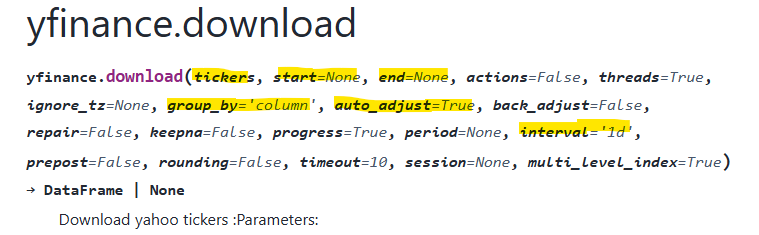


 - **tickers** - We state the company tickers that we need to download pricing information for.
 - **start** - We set the start date we wish to extract the pricing data from as the 1st January 2014.
 - **end** - We set the end date we wish to extract the pricing data from as the 30th November 2025.
 - **interval** - We set the interval time period we want to pull the data from. This can be from 1 minute,hourly, daily up to 3 months - we will use daily pricing data.
 - **group_by** - This sets the order of the columns(headers) - we group the pricing information by **ticker** first and then by **column**, easier to extract pricing data for one ticker this way. If not stated default is to group by **column** only.
     - This gives a multi-index structure where we have two level headers:
         - Level 0 - Ticker type (META,AAPL,AMZN,TSLA,GOOG,NVDA,MSFT)
         - level 1 - Price type (Open,High,Low,Close,Volume)
 - **auto_adjust** - This adjusts the pricing data to account for stock splits and dividends. Default if not stated is **True**




In [3]:
 # Set up the function 'get_data()' that can be called for closing prices of FAANG stocks over the last 10 years
   
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)


# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html




[*********************100%***********************]  7 of 7 completed


# Comments 2 - Download Dataset
In order to explore the data, we'll save the file to a csv folder, we will usa a placeholder for the file name.

In [18]:
# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# Comment 3 - Initial Exploratory Analysis & Cleaning

We will view the first five rows **df.head()**, last five rows **df.tail()** & use **df.info** to show the index range, columns count & names - we also display non-null values & the datatype

- **df.head()** & **df.tail()** show a clear visual of MultiIndex structure - with level 0 **Ticker** (META, AAPL, MSFT,...) & level 1 **Price** (Open, High, Low,...) data shown.
    The data suggests a significant increase in adjusted prices between the opening five rows (early January 2014 pricing) and the last five rows (late November 2025 pricing).As an example, **Meta's** adjusted opening price on the 2nd January 2014 was **54.44 (rounded)** and had increased to **635.56 (rounded)** by the 28th November 2025.

- **df.info()** displays key information about the dataset:
    - Confirms a pandas DataFrame structure - **<class 'pandas.core.frame.DataFrame'>**
    - Confirms a DatetimeIndex with 2996 days of price data, ranging from January 2nd 2014 to 28th Novemeber 2025 - **DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28**
    - Confirms 35 columns and the columns naming convention in a MultiIndex structure that we saw initially also using df.head() & df.tail()
    - Confirms non-null values with **Non-Null Count** & that our data types is floats & integers for pricing information.  

       **See image below with df.info() information for first two stocks shown.**

    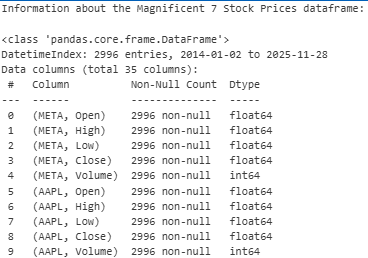

    - **df.isnull().sum()** is also used to confirm missing null values present.This checks each column for null entriew & returns the count. This method focuses purely on identifying missing data and can be used in conjunction with **df.info()** which is more a high-level overview of all key information.
    We see 0 returned which gives us confidence to proceed with further analysis of the dataset.
    It was expected that no non-null values would be present - yfinance excludes non-trading days - it is still important to verify the dataset before proceeding with further analysis as this may not always be the case with other datasets.



In [ ]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# Display the first 5 rows of the dataframe
print("First 5 rows of the Magnificent 7 Stock Prices dataframe:\n")
display(df.head())

# Display the first 5 rows of the dataframe
print("Last 5 rows of the Magnificent 7 Stock Prices dataframe:\n")
display(df.tail())

# Info about the dataframe
print("Information about the Magnificent 7 Stock Prices dataframe:\n")
df.info()


First 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker           META                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2014-01-02  54.449660  54.836954  53.814097  54.330490  43195500  17.235795   
2014-01-03  54.638334  55.263965  54.151732  54.181526  38246200  17.148330   
2014-01-06  54.042497  56.862796  53.675064  56.803215  68852600  16.670347   
2014-01-07  57.299744  58.143846  56.823074  57.518215  77207400  16.883434   
2014-01-08  57.200438  58.004821  56.833006  57.826069  56682400  16.712537   

Ticker                                                  ...       MSFT  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2014-01-02  17.277669  17.122271  17.156700  234684800  ...  30.988778   
2014-01-03  17.174384  16.762782  16.779842  392467600  ...  30.864311   
2014-01-06  16.960359  16.550929  16.871340  412610800  ...  30.573917   
2014-01-07  16.934302  16.684922  16.750679  317209200  ...  30.142491   
2014-01-08  16.921905  16.708816  16.856770  258529600  ...  29.868697   

Ticker                                                     NVDA            \
Price            High        Low      Close    Volume      Open      High   
Date                                                                        
2014-01-02  31.030265  30.781356  30.831139  30632200  0.375278  0.376693   
2014-01-03  30.880905  30.366497  30.623701  31134800  0.374571  0.375278   
2014-01-06  30.607105  29.959951  29.976545  43603700  0.373157  0.377164   
2014-01-07  30.275241  30.042926  30.208864  35802800  0.378107  0.381879   
2014-01-08  29.984852  29.520230  29.669571  59971700  0.381879  0.387536   

Ticker                                     
Price            Low     Close     Volume  
Date                                       
2014-01-02  0.370564  0.373864  260092000  
2014-01-03  0.368206  0.369385  259332000  
2014-01-06  0.369621  0.374335  409492000  
2014-01-07  0.375514  0.380464  333288000  
2014-01-08  0.380464  0.385650  308192000  

[5 rows x 35 columns]

Last 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker            META                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  588.020433  597.632589  581.385829  593.765747  21052600   
2025-11-24  598.232075  616.197465  597.142998  612.550415  23554900   
2025-11-25  623.491465  636.530818  617.796098  635.701477  25213000   
2025-11-26  637.170320  637.839757  631.115261  633.093628  15209500   
2025-11-28  635.561675  647.521891  634.982130  647.421997  11033200   

Ticker            AAPL                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-11-21  265.950012  273.329987  265.670013  271.489990  59030800  ...   
2025-11-24  270.899994  277.000000  270.899994  275.920013  65585800  ...   
2025-11-25  275.269989  280.380005  275.250000  276.970001  46914200  ...   
2025-11-26  276.959991  279.529999  276.630005  277.549988  33431400  ...   
2025-11-28  277.260010  279.000000  275.989990  278.850006  20135600  ...   

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  478.500000  478.920013  468.269989  472.119995  31769200   
2025-11-24  475.000000  476.899994  468.019989  474.000000  34421000   
2025-11-25  474.070007  479.149994  464.890015  476.989990  28019800   
2025-11-26  486.309998  488.309998  481.200012  485.500000  25709100   
2025-11-28  487.600006  492.630005  486.649994  492.010010  14386700   

Ticker            NVDA                                                 
Price             Open        High         Low       Close     Volume  
Date                                                                   
2025-11-21  181.229910  184.549717  172.920360  178.870041  346926200  
2025-11-24  179.480013  183.489785  176.470171  182.539841  256618300  
2025-11-25  174.900263  178.150082  169.540561  177.810104  320600300  
2025-11-26  181.619888  182.899816  178.230078  180.249954  183852000  
2025-11-28  179.000025  179.280009  176.490171  176.990143  121332800  

[5 rows x 35 columns]

Information about the Magnificent 7 Stock Prices dataframe:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (META, Open)    2996 non-null   float64
 1   (META, High)    2996 non-null   float64
 2   (META, Low)     2996 non-null   float64
 3   (META, Close)   2996 non-null   float64
 4   (META, Volume)  2996 non-null   int64  
 5   (AAPL, Open)    2996 non-null   float64
 6   (AAPL, High)    2996 non-null   float64
 7   (AAPL, Low)     2996 non-null   float64
 8   (AAPL, Close)   2996 non-null   float64
 9   (AAPL, Volume)  2996 non-null   int64  
 10  (AMZN, Open)    2996 non-null   float64
 11  (AMZN, High)    2996 non-null   float64
 12  (AMZN, Low)     2996 non-null   float64
 13  (AMZN, Close)   2996 non-null   float64
 14  (AMZN, Volume)  2996 non-null   int64  
 15  (GOOG, Open)    2996 non-null   float64
 16 

In [ ]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# check for null values
df.isnull().sum()


# References:
# Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html


Ticker  Price 
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

# Comment 4 - Price Analysis

We extract the closing prices from our DataFrame and link this to the variable**closing_prices**. It is good practice to link the data to a variable rather than referencing individual stock tickers directly, as this allows us to expand/amend the stock ticker company information that we wish to analyse.
As we have a MultiIndex DataFrame we cannot directly call the closing prices using **df['Close']**
We will use **df.xs()** -  this allows us to return a specified section of the DataFrame - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)

```python
closing_prices= df.xs('Close', level=1, axis=1)
```

ii)
We will now plot the closing prices for the seven stocks across the time horizon January 2014 - November 2025 to see the price movements.

In [ ]:
# Comment 4 - Price Analysis

#Closing prices for 7 stocks - put as variable so can easily amend single line if future stocks added
#closing_Prices = df['Close'] - Can't use as multiindex dataframe
# get closing prices only from multiindex dataframe
closing_prices= df.xs('Close', level=1, axis=1)    # https://www.w3schools.com/python/pandas/ref_df_xs.asp     # xs() function to extract cross-section of data from multiindex dataframe
# References:
# Pandas MultiIndexing - https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing

Shows groth in stock vidsually but does not show returns numerically


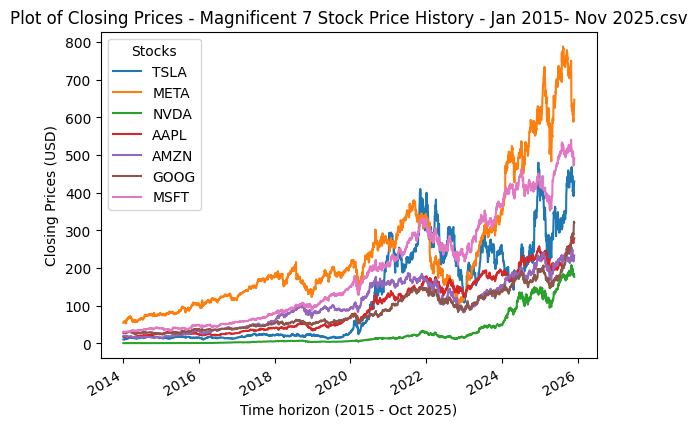

In [ ]:
# Comment 4 - Price Analysis

#Create new figure and axis

fig, ax = plt.subplots()                                                            # References: Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html


# Plot closing prices
closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (Jan 2015 - Nov 2025)")
ax.set_ylabel("Closing Prices (USD)")

#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")

print(f'Shows groth in stock visually but does not show returns numerically')



Analysis:

All stocks show long term growth from January 2014 to November 2025 and is a useful viusal for showing the increase in the stock price. It is difficult from this graph to see the % growth numerically in the stocks monthly, quarterly or yearly.


In [26]:
# A)
# iii) Plot the mean closing stock price for each month

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


df_mean_monthly_price = closing_prices.resample("ME").mean(numeric_only=True) # 'ME' = month end frequency,groups data by month & labels by month end date

df_mean_monthly_price.head()



Ticker,TSLA,META,NVDA,AAPL,AMZN,GOOG,MSFT
Date,,,,,,,
2014-01-31,10.936794,56.533192,0.372910,16.670214,19.743167,28.092583,30.159481
2014-02-28,13.734877,65.910123,0.408585,16.416072,17.716842,29.422623,31.009995
2014-03-31,15.543111,66.627918,0.431469,16.637965,18.131524,29.237682,32.588056
2014-04-30,13.885841,59.193184,0.440614,16.883222,16.082071,26.727042,33.548553
2014-05-31,13.311619,59.670327,0.437373,18.902069,15.147691,26.431316,33.515894


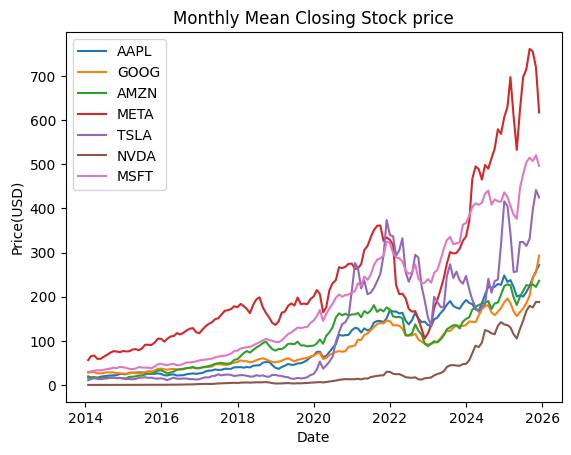

In [29]:
# can't use date as x index as used as index & no longer a column
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="AAPL", label="AAPL")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="GOOG", label="GOOG")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="AMZN", label="AMZN")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="META", label="META")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="TSLA", label="TSLA")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="NVDA", label="NVDA")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="MSFT", label="MSFT")


plt.title("Monthly Mean Closing Stock price")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.show()

# Comment 5 - 
1. Plot closing prices across the time horizon for the stock, setting x+ y lables, legend

In [ ]:
## Comparison of temperature - to be deleted later

# Plot the stock prices - as above   
# ii) Plot the mean temperature each day - can't do as can only get last 60 days from yfinance free API
# iii) Plot the mean temperature for each month
# iv)#ii)The rolling windspeed (say over 24 hours)


# Will get the daily average stock price & plot this
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases



#Refernce to weather code from previous assignments
#df_daily_temp = df.resample("D").mean(numeric_only=True) # 'D' = daily frequency

# can't use 'date' as x index as used as index & no longer a column
#sns.lineplot(data=df_daily_temp, x=df_daily_temp.index, y="temp")

#plt.title("Daily Mean Temperature")
#plt.xlabel("Date")
#plt.ylabel("Temperature(°C)")
#plt.show()



# Comment 4 - Resampling & returns


Financial performance, particularly for hedge funds and asset managers, is typically reported to investors on a monthly or quarterly basis rather than daily. This frequency reduces the noise from daily fluctations oin the stock and allows investors to see the rate of return (ROR) month on month.

For more illiquid asset classes, such as private equity funds,  valuations are often available only on a quarterly basis. This is due to the difficulty in pricing non-publicly traded assets, including buildings, infrastructure projects, and private companies.

Although, in this instance, the Magnificent 7 stocks trade daily, we will resample the data  to more closely reflect a real-world financial reporting scenario in a hedge fund. 

## Step 1 - Resample data

**Pandas resampling**  allows us to customise the time periods for our data into smaller time periods - we will convert the data from daily to (i) **Monthly (month-end prices)** ; (ii) **Quarterly (quarter-end prices)** ; (iii) **Yearly (year-end prices)**. [Reference: pandas - resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)


See below:

```python
# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last() 
```
 - **BME/BQE/BYE** is used to group the rows into monthly/quarterly/yearly data. **'B'** represents **Business**, this is applied to Month/Quarter/Yearly End
 - **.last()** is used to select the final prices in the resampled grouped period(s) (monthly/quarterly/yearly)


## Step 2 - Extract Closing Prices only from resampled data

Our data is now grouped as per the above resampled period (**Step 1**), we are displaying **Open, High, Low, Close, Volume** pricing data grouped per each applicable stock.
We now want to extract **Close** pricing information for each stock.
We use the resampled data for the periods (monthly/quarterly/yearly) to now extract the **Close** price only using **.xs**. This allows us to return a specifed section of the dataframe - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)


 - **'close'** - this is the key parameter we want **'close'**
 - **level=1** - give us access to the price column as it is a multi level index. level=0 would be the tickers.
 - ***axis=1** - points to the columns rather than the default=0 which is the rows. **'close'** is not present in the rows.

```python
# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)
```


## Step 3 - Get % change of returns across the periods (closing prices)

Our data is now grouped with the closing prices only for our resampled periods.  
We will now get the percentage change from the first data point to the second and consecutively thereforth for each data point. This is done using **.pct_change** method  (https://www.w3schools.com/python/pandas/ref_df_pct_change.asp) which by default shows the percantage change between each row - current row - and the previous row. This allows us to see increase/decrease in stock performance across the Month/Quarter/Yearly resampled closing price periods.

 - **.dropna()** - drops the na that will appear for the first row in each of our dataframes as we are comparing the first row against no prior data.  
 -**100** - we multiply by 100 to convert to % terms from decimals as easier to view change in % terms , also mirrors real life scenario comparisons.

```python
# Calculate Monthly/Quarterly/Yearly Returns
monthly_returns = monthly_close.pct_change().dropna() *100              # Multiply by 100 as to get percentage returns - decimals hard to easily read
quarterly_returns = quarterly_close.pct_change().dropna() *100
yearly_returns = yearly_close.pct_change().dropna() *100
```


These time horizons are how hedge funds performance & rate of return is presented in marketing materials to existing investors & prospective investors, allowing for easier comparison across the industry.


In [22]:
# Month end closing prices - standard in industry to use month end prices for analysis
# References:
# Pandas Resample - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# Pandas Offset Aliases - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   # Used Business month end(BME) rather than month end (ME) as stocks open on business days only, accounted for in yfinance data already
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last()  


# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)

# pct_change()= % change between current & previous row
# https://www.w3schools.com/python/pandas/ref_df_pct_change.asp

# Calculate Monthly/Quarterly/Yearly Returns
monthly_returns = monthly_close.pct_change().dropna() *100              # Multiply by 100 as to get percentage returns - decimals hard to easily read
quarterly_returns = quarterly_close.pct_change().dropna() *100
yearly_returns = yearly_close.pct_change().dropna() *100




In [23]:
# Comment 4 - Resampling & returns

# Display summary statistics of monthly returns
monthly_returns.describe()

Ticker,TSLA,META,NVDA,AAPL,AMZN,GOOG,MSFT
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,3.937110,2.124041,5.255970,2.344340,2.190561,1.944521,2.139667
std,17.589615,9.561290,12.995224,7.684829,8.714185,7.053624,6.145529
min,-36.733435,-32.634236,-32.027415,-18.119760,-23.752509,-17.674970,-13.024770
25%,-7.584367,-3.711355,-2.616975,-3.253778,-3.995964,-2.089021,-1.505760
50%,0.830082,1.731821,4.931271,2.782259,2.246525,1.728958,2.049319
75%,12.169052,8.078820,13.040449,7.754292,7.506301,6.649241,5.991088
max,74.145213,27.156926,38.544591,21.656937,27.059597,20.191733,19.626205


## Comment 4 - Resampling & returns - Description:

We can see from the above:

**mean** - This shows the average month on month return across the period ( Jan 1st 2104 - 30th Novemebr 2025)
     - Monthly average returns are positive for all stocks, with range between 1.9% - 5.25%.
     - **Nividia** has the highest monthly average return with a healthy 5.25% mean return
     - **Google** has the lowest monthly average return with 1.94%

**std** - This shows the **standard deviation** (how much the returns vary) across the period. Higher the more volatile(risky) the returns.
     - **Tesla** is the most volatile(17.58%) & **Nividia**(12.99%) is 2nd most volatile, then **Meta**(9.56%)
     - **Microsoft** (6.14%) is the lowest/least volatile returns.

**min** - This shows the biggest loss month on month.
      - **Tesla**(-36.73%), **Meta**(-32.63%) & **Nividia**(-32.02%) have seen the biggest month on month loss in the period.
      - **Microsoft** had the lowest % loss (-13.02%)
      - This is broadly consistent with stocks that had the highest & lowest standard deviation

**25%** - This shows how many of the returns were in the lowest 25% quarttile.
     - **Tesla** led this - 25% of returns are worse than **-7.58%**.
     
**50%** - This shows the median return of the stocks. Median counts the value in the middle & reduce low or high outliers in % returns.
      - All stock had positive returns, **Nividia** (4.93%) being the highest

**75%** - This shows how many of the returns were in the highest 25% quartile.
      - **Nividia**(13.04%) & ***Tesla** (12.16%) had the highest %, 25% of returns are above this value.

**max** - This shows the highest % return in the period.
     - **Tesla** (74.14%) & **Nividia**(38.54%) had the largest rate of return.
     - Other stocks performed strongly - Microsoft (19.62%) being the lowest.

The **Tesla** 74.14% is a massive outlier in month on month increase. Upon investigation , this was a genuine monthly return and was due to pricing speculation after Tesla announced a 5-for-1 stock split in August 2020.[Tesla stock jump](https://www.cnbc.com/2020/08/31/apple-tesla-jump-as-stock-splits-take-effect.html?msockid=11017dd644a966b708f66faa45d66739)
Stock split lowers the price of a single share - value of a share is reduced proportionately to the split - so that investors that were priced out of buying a single stock now may be able to trade the stock due to the reduced price.

**Tesla** was shown to be the most volatile from the standard deviation of returns(17.58%). This can be seen by the stock leading the way with the biggest loss(-36.73%) and the highest return(74.14%)
Investors with a high risk appetite might favour this stock while investors drawn to more stable returns might prefer **Microsoft** which had the lowest standard deviation (6.14%); the lowest loss (-13.02%) & stable mean(2.13%) & median returns(2.04%)





Comment  6
stock price ( as above)
Mean Stcok Price each day
Mean stock price each month
Rolling Stock Price

In [27]:
# Get the % returns for each stock since start of data to end of data

df_percent_returns = (df_mean_monthly_price / df_mean_monthly_price.iloc[0] - 1) * 100


# Get the monthly returns for each stock
df_returns = df_mean_monthly_price.pct_change() * 100

# Calculate mean returns for each stock
mean_returns = df_returns.mean()

# Volatility - standard deviation of returns
volatility = df_returns.std()

